In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.stats import norm

Stochastisk simulation notes and examples: 

Topics related: 
- Random number gereration 
- Random variable generation
- The event by event principle
- Variance reduction methods

Simulation based statistical methods:
- Markov chain Monte Carlo
- Bootstrap

Validation and verification of models



Exercise 1: 

Formulate the linear congruential generator: 

In [84]:
def lcg(M,c,a,x0,sample_size):
    if M%1 !=0 or c%1 !=0 or a != 0 or x0 != 0:
        pass
    disp = True
    x = [x0]
    u =[x0/M]
    for i in range(1,sample_size):
        xi = (a*x[i-1]+c)%M
        x.append(xi)
        u.append(xi/M)
        if xi == x0 and disp == True:
            print(f"cycle has a length of {i-1} iterations")
            disp =False
    return [x,u]
    

cycle has a length of 521 iterations


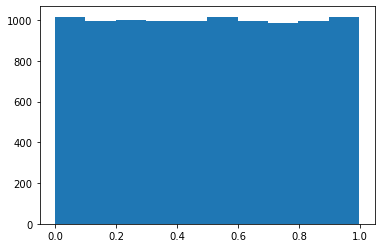

In [265]:
sample_size = 10000
M = 523
c=1
a=5
x0=3
[x,u] = lcg(M = M,c= c,a = a,x0 = x0,sample_size = sample_size)

#M=77,a=8,c=6,x0=3 -- Good

(n,bins,patches) = plt.hist(u,bins=10)

Evaluation the lcg function with Chi^2 test

In [266]:
# CHi i anden test for uniform med samme n_expected : 

classes = np.shape(bins)[0]-1
n_expected = 1/classes*sample_size

chi =0
for i in range(classes):
    chi = chi+((n[i]-n_expected)**2)/n_expected
print(chi)



1.01


Testing with 

Adjusted test_statistics:  0.3242678131484286


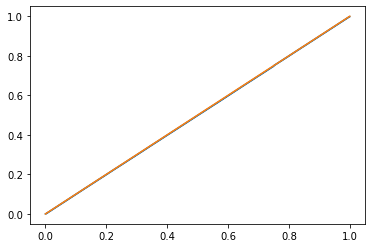

In [267]:
sortu = np.sort(u)
idx = np.linspace(0,1,sample_size)
test_statistic = max((abs(sortu-idx)))
Adj_test_statistics = (np.sqrt(sample_size)+0.12+(0.11/np.sqrt(sample_size)))*test_statistic
print('Adjusted test_statistics: ', Adj_test_statistics)
plt.plot(idx,sortu)
plt.plot(idx,idx)



Auto-correlation function with lag = 1:

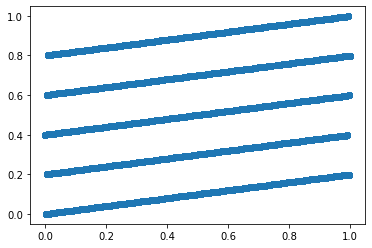

In [268]:
plt.scatter(u[1:sample_size],u[0:sample_size-1])


Independence tests for generator:

In [269]:
# Wald-Wolfowitz test
med = np.median(u)
rover =0 
runder = 0
under =False
over = False
for i in range(sample_size):

    if u[i]<med and under ==False:
        runder=runder+1
        under = True
        over =False

    if u[i]>med and over ==False:
        rover=rover+1
        over =True
        under =False
    
T =rover+runder
print(T)


3980


In [288]:
# Up/Down from knuth: 
status = None
runlength =[]
count = 0
for i in range(1,sample_size):
    count=count+1
    if u[i] > u[i-1] and status != True:
        runlength.append(count)
        count=0
        status = False
    if u[i]<u[i-1] and status != False:
        runlength.append(count)
        count=0
        status = True

z-value:  357.82273527886036


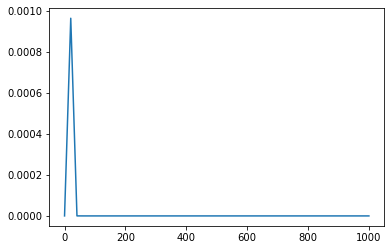

In [292]:
n = sample_size
[values,count] = np.unique(runlength,return_counts=True)


if np.shape(count)[0] != 6:
    R = np.append(count[0:5],sum(count[5:]))
else:
    R =count

A = [[4529.4 ,9044.9, 13568 ,18091, 22615, 27892],
[9044.9, 18097 ,27139, 36187, 45234, 55789],
[13568, 27139, 40721, 54281, 67852, 83685],
[18091 ,36187, 54281, 72414, 90470, 111580],
[22615, 45234, 67852, 90470, 113262, 139476],
[27892 ,55789, 83685, 111580, 139476, 172860]]
A =np.asarray(A)

B = [1/6,5/24,11/120,19/720,29/5040,1/840]
B = np.asarray(B)

z = 1/(n-6) * (R-n*B).T  @(  A@(R-n*B) )
print("z-value: ",z)

idx = np.linspace(0,1000)
plt.plot(idx, chi2.pdf(idx, df=6))


In [297]:
# The-Up-and-Down Test: 
runs = 0 
state = None
runlength=[]
for i in range(sample_size):

    count=count+1
    if u[i] > u[i-1] and status != True:
        runlength.append(count)
        count=0
        status = False
    if u[i]<u[i-1] and status != False:
        runlength.append(count)
        count=0
        status = True

runs = np.shape(runlength)[0]


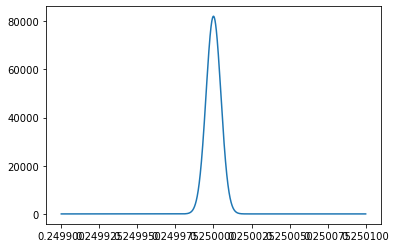

In [287]:
# Correlation test:
h = 2
sum = 0
for i in range(n-h):
    sum = sum + u[i]*u[i+h]

ch = 1/(n-h)*sum

mu = 0.25
idx =np.linspace(mu-0.0001,mu+0.0001,n)
sigma = 7/(144*n)

plt.plot(idx,norm.pdf(idx, mu, sigma))
